### Exploratory Data Analysis (EDA) on Benin-Malanville Data

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import os,sys
from pandas.plotting import scatter_matrix 

rpath = os.path.abspath('..')
if rpath not in sys.path:
    sys.path.insert(0, rpath)


from scripts.utils import (
    detect_outliers_iqr,
    plot_time_series, 
    plot_correlation_analysis, 
    plot_wind_analysis, 
    plot_temperature_analysis, 
    plot_histograms, 
    calculate_z_scores, 
    plot_bubble_chart, 
    clean_dataset
)


Reading the data from CSV

In [6]:
benin_df = pd.read_csv('../Data/benin-malanville.csv')
benin_df.head(10)

Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1  2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2  2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3  2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4  2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   
5  2021-08-09 00:06 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.8  0.0     0.4   
6  2021-08-09 00:07 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.7  0.0     0.0   
7  2021-08-09 00:08 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.7  0.7     1.3   
8  2021-08-09 00:09 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.6  0.4     1.1   
9  2021-08-09 00:10 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.6  0.5     1.1   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.1  122.1      0.0  998         0            0.0   26.3   26.2   
1      0.0    0.0      0.0  998         0            0.0   26.3   26.2   
2      0.5  124.6      1.5  997         0            0.0   26.4   26.2   
3      0.4  120.3      1.3  997         0            0.0   26.4   26.3   
4      0.3  113.2      1.0  997         0            0.0   26.4   26.3   
5      0.1  119.1      0.0  997         0            0.0   26.4   26.3   
6      0.0    0.0      0.0  997         0            0.0   26.5   26.3   
7      0.6  126.8      2.8  997         0            0.0   26.5   26.3   
8      0.5  124.9      5.5  997         0            0.0   26.5   26.4   
9      0.5  114.2      5.1  997         0            0.0   26.5   26.4   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  
5       NaN  
6       NaN  
7       NaN  
8       NaN  
9       NaN

In [7]:
benin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [8]:
# Shape of the dataframe

benin_df.shape

(525600, 19)

In [9]:
# Check null values

null_values = benin_df.isnull().sum()
null_values

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [10]:
# Data summary

benin_df.describe()

GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000000   
25%         0.000000      24.200000      28.800000       1.000000   
50%         4.300000      28.000000      55.100000       1.900000   
75%       447.900000      32.300000      80.100000       3.100000   
max      1342.300000      43.800000     100.000000      19.500000   

              WSgust        WSstdev             WD        WDstdev  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean        2.809195       0.473390     153.435172       8.582407   
std         2.029120       0.273395     102.332842       6.385864   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.300000       0.400000      59.000000       3.700000   
50%         2.600000       0.500000     181.000000       8.600000   
75%         4.100000       0.600000     235.100000      12.300000   
max        26.600000       4.200000     360.000000      99.400000   

                  BP       Cleaning  Precipitation          TModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      994.197199       0.000923       0.001905      35.246026   
std         2.474993       0.030363       0.037115      14.807258   
min       985.000000       0.000000       0.000000       9.000000   
25%       993.000000       0.000000       0.000000      24.200000   
50%       994.000000       0.000000       0.000000      30.000000   
75%       996.000000       0.000000       0.000000      46.900000   
max      1003.000000       1.000000       2.500000      81.000000   

               TModB  Comments  
count  525600.000000       0.0  
mean       32.471736       NaN  
std        12.348743       NaN  
min         8.100000       NaN  
25%        23.600000       NaN  
50%        28.900000       NaN  
75%        41.500000       NaN  
max        72.500000       NaN

### Summary Statistics

Mean

In [11]:
numeric_df = benin_df.select_dtypes(include=['number'])
numeric_df.mean()

GHI              240.559452
DNI              167.187516
DHI              115.358961
ModA             236.589496
ModB             228.883576
Tamb              28.179683
RH                54.487969
WS                 2.121113
WSgust             2.809195
WSstdev            0.473390
WD               153.435172
WDstdev            8.582407
BP               994.197199
Cleaning           0.000923
Precipitation      0.001905
TModA             35.246026
TModB             32.471736
Comments                NaN
dtype: float64

Median

In [12]:
numeric_df = benin_df.select_dtypes(include=['number'])
numeric_df.median()

GHI                1.8
DNI               -0.1
DHI                1.6
ModA               4.5
ModB               4.3
Tamb              28.0
RH                55.1
WS                 1.9
WSgust             2.6
WSstdev            0.5
WD               181.0
WDstdev            8.6
BP               994.0
Cleaning           0.0
Precipitation      0.0
TModA             30.0
TModB             28.9
Comments           NaN
dtype: float64

Standard Deviation

In [13]:
numeric_df = benin_df.select_dtypes(include=['number'])
numeric_df.std()

GHI              331.131327
DNI              261.710501
DHI              158.691074
ModA             326.894859
ModB             316.536515
Tamb               5.924297
RH                28.073069
WS                 1.603466
WSgust             2.029120
WSstdev            0.273395
WD               102.332842
WDstdev            6.385864
BP                 2.474993
Cleaning           0.030363
Precipitation      0.037115
TModA             14.807258
TModB             12.348743
Comments                NaN
dtype: float64

Range

In [14]:
numeric_df = benin_df.select_dtypes(include=['number'])
range_value = numeric_df.max() - numeric_df.min()
range_value

GHI              1425.9
DNI               960.1
DHI               771.8
ModA             1342.3
ModB             1342.3
Tamb               32.8
RH                 97.9
WS                 19.5
WSgust             26.6
WSstdev             4.2
WD                360.0
WDstdev            99.4
BP                 18.0
Cleaning            1.0
Precipitation       2.5
TModA              72.0
TModB              64.4
Comments            NaN
dtype: float64

Variance

In [15]:
numeric_df = benin_df.select_dtypes(include=['number'])
variance_values = numeric_df.var()
variance_values

GHI              109647.955903
DNI               68492.386135
DHI               25182.856923
ModA             106860.248524
ModB             100195.365569
Tamb                 35.097295
RH                  788.097191
WS                    2.571103
WSgust                4.117327
WSstdev               0.074745
WD                10472.010561
WDstdev              40.779260
BP                    6.125591
Cleaning              0.000922
Precipitation         0.001378
TModA               219.254876
TModB               152.491463
Comments                   NaN
dtype: float64

#### Data Quality Check

Missing Values

In [16]:
missing_values = benin_df.isna().sum()
missing_values

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

Check for negative values in columns that should only have positive values

In [17]:
incorrect_entries = {
    'GHI': (benin_df['GHI'] < 0).sum(),
    'DNI': (benin_df['DNI'] < 0).sum(),
    'DHI': (benin_df['DHI'] < 0).sum(),
}

print("\nIncorrect Values:")
for key, value in incorrect_entries.items():
    print(f' {key} : {value}')


Incorrect Values:
 GHI : 258847
 DNI : 275987
 DHI : 259182


Detect Outlier using Function

In [18]:
from scripts.utils import detect_outliers_iqr

outliers = {
    'ModA': detect_outliers_iqr(benin_df['ModA']),
    'ModB': detect_outliers_iqr(benin_df['ModB']),
    'WS': detect_outliers_iqr(benin_df['WS']),
    'WSgust': detect_outliers_iqr(benin_df['WSgust'])
}

print("\nOutliers Detected:")
for key, value in outliers.items():
    print(f' {key} : {value}')


Outliers Detected:
 ModA : 98
 ModB : 240
 WS : 6717
 WSgust : 5368


### Time Series Analysis

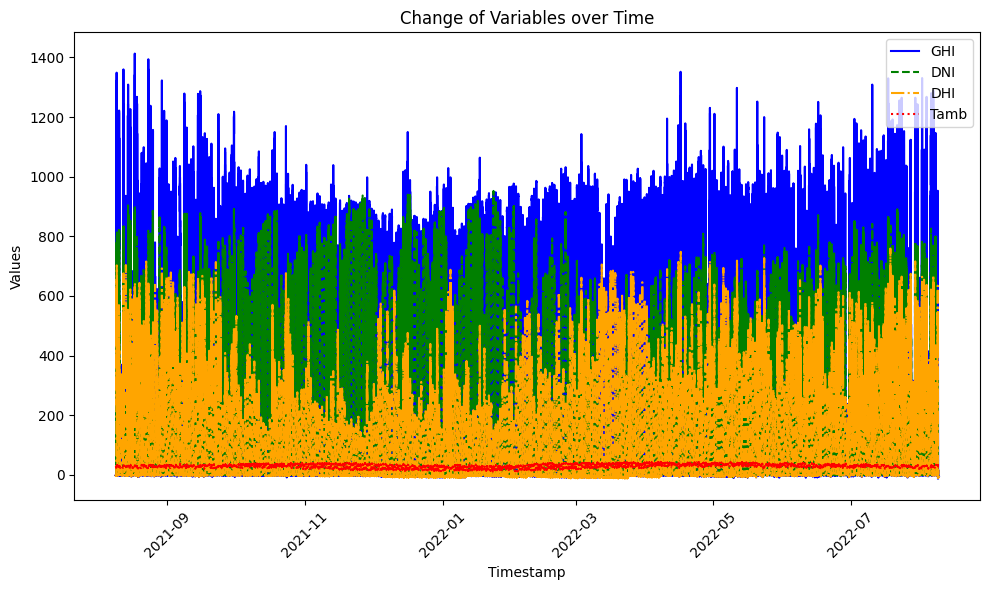

In [19]:
plot_time_series(benin_df)

### Correlation Analysis plots

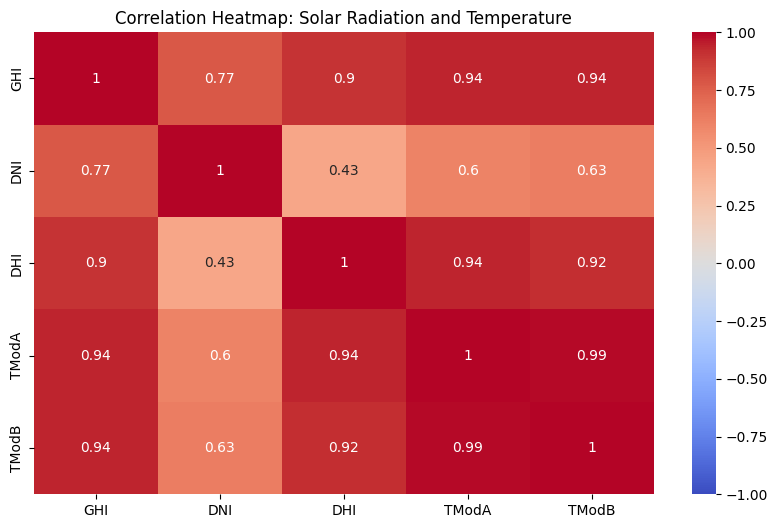

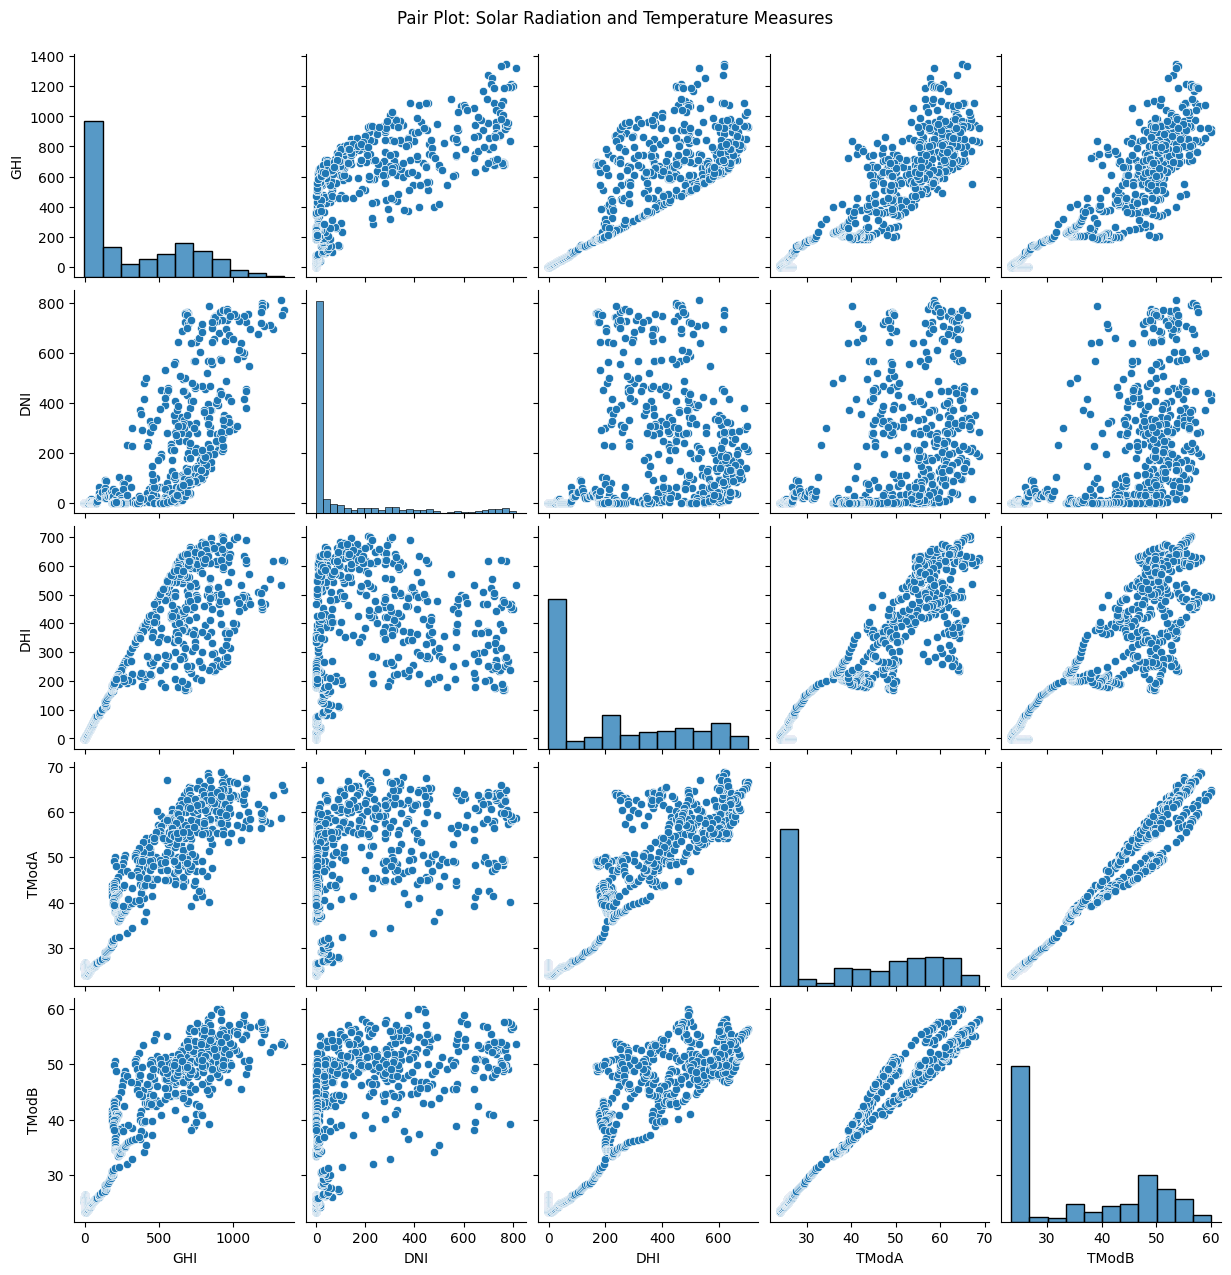

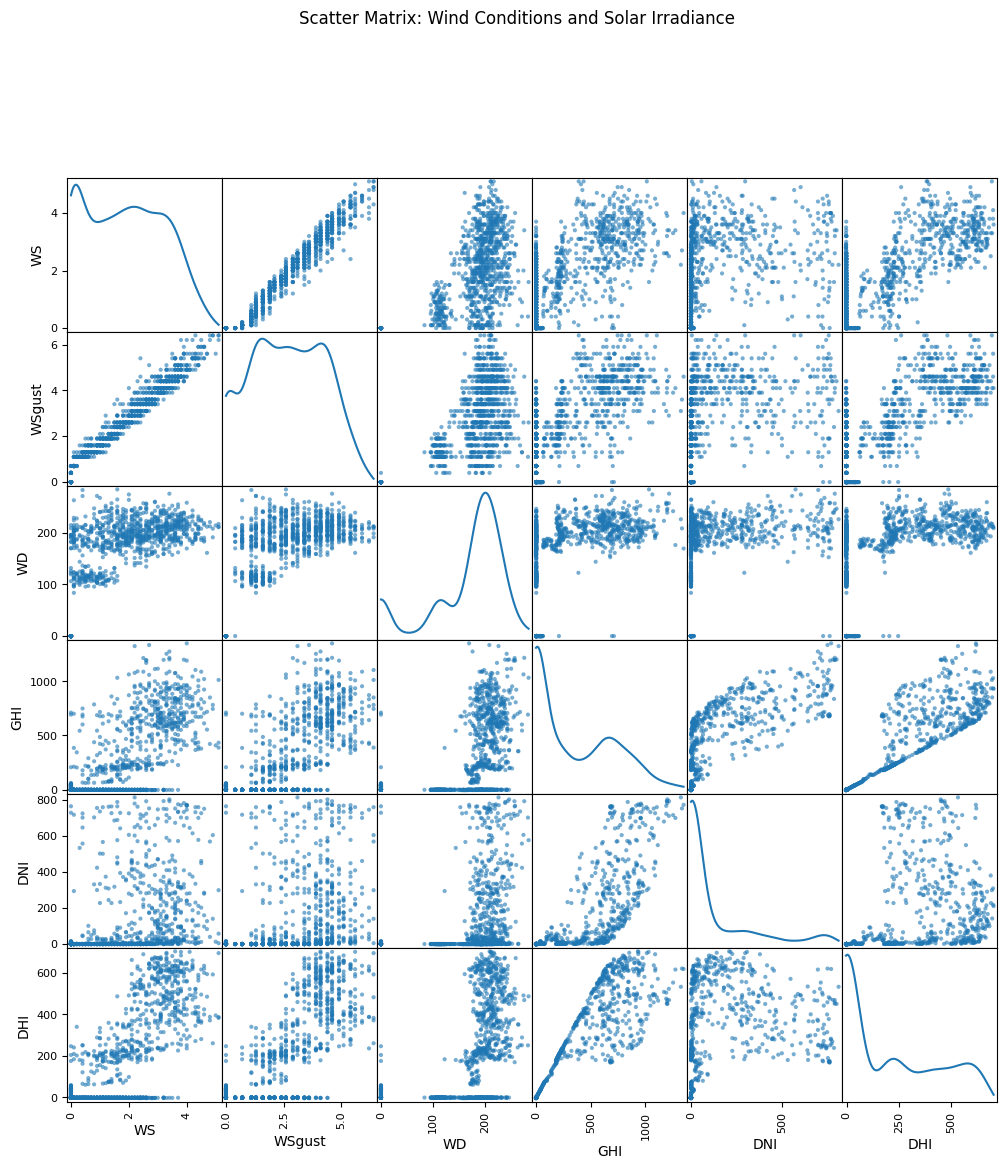

In [20]:
plot_correlation_analysis(benin_df)

### Wind Analysis plots

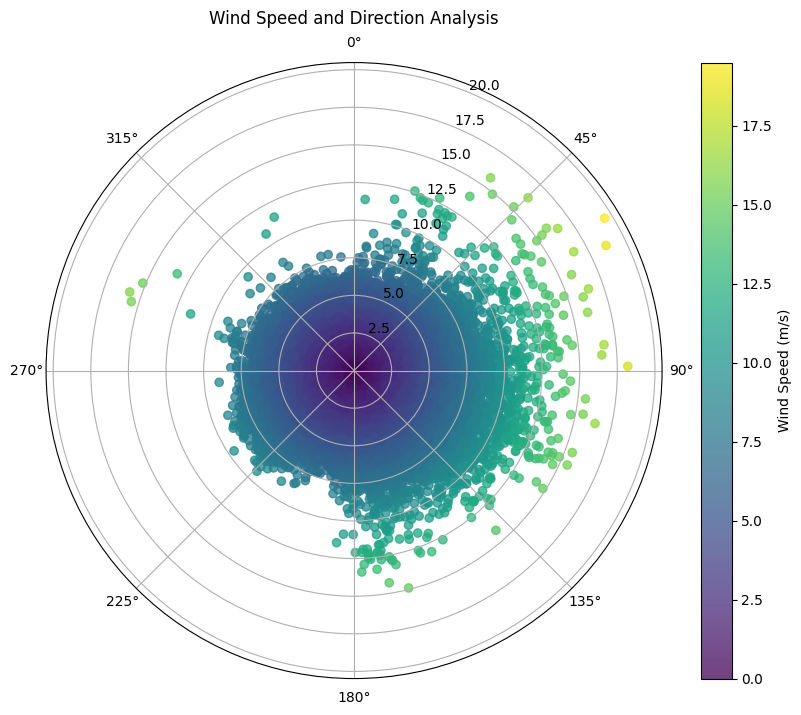

Wind Direction Variability (Standard Deviation): 102.33 degrees


In [21]:
plot_wind_analysis(benin_df)

### Temperature Analysis plots

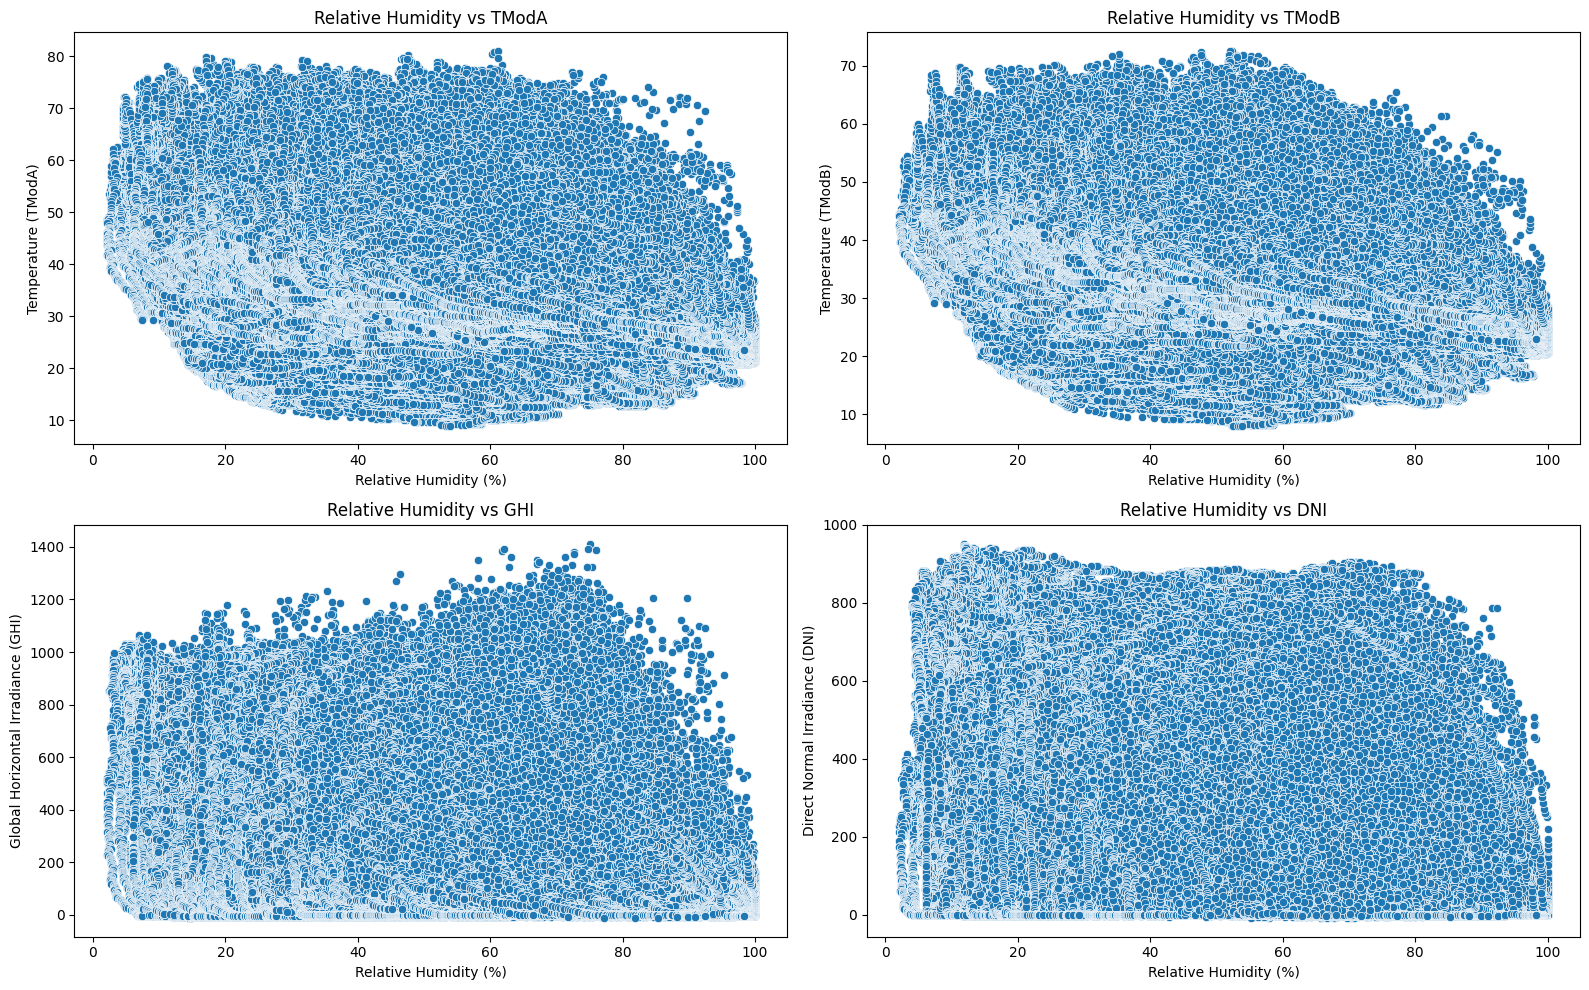

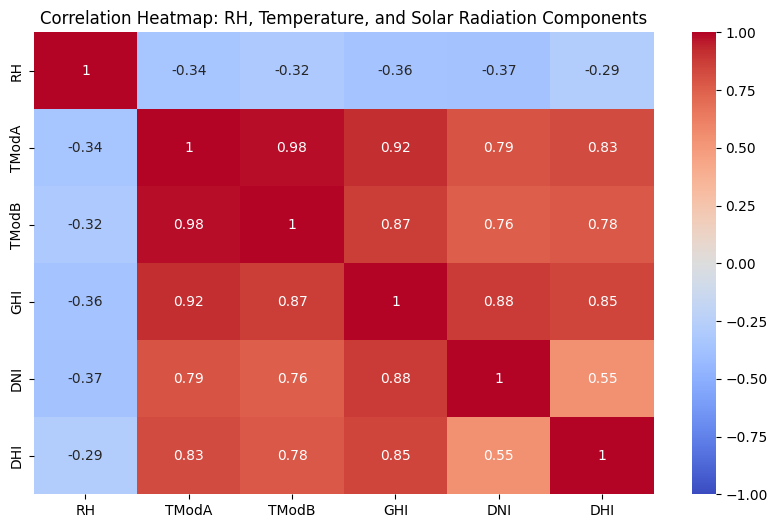

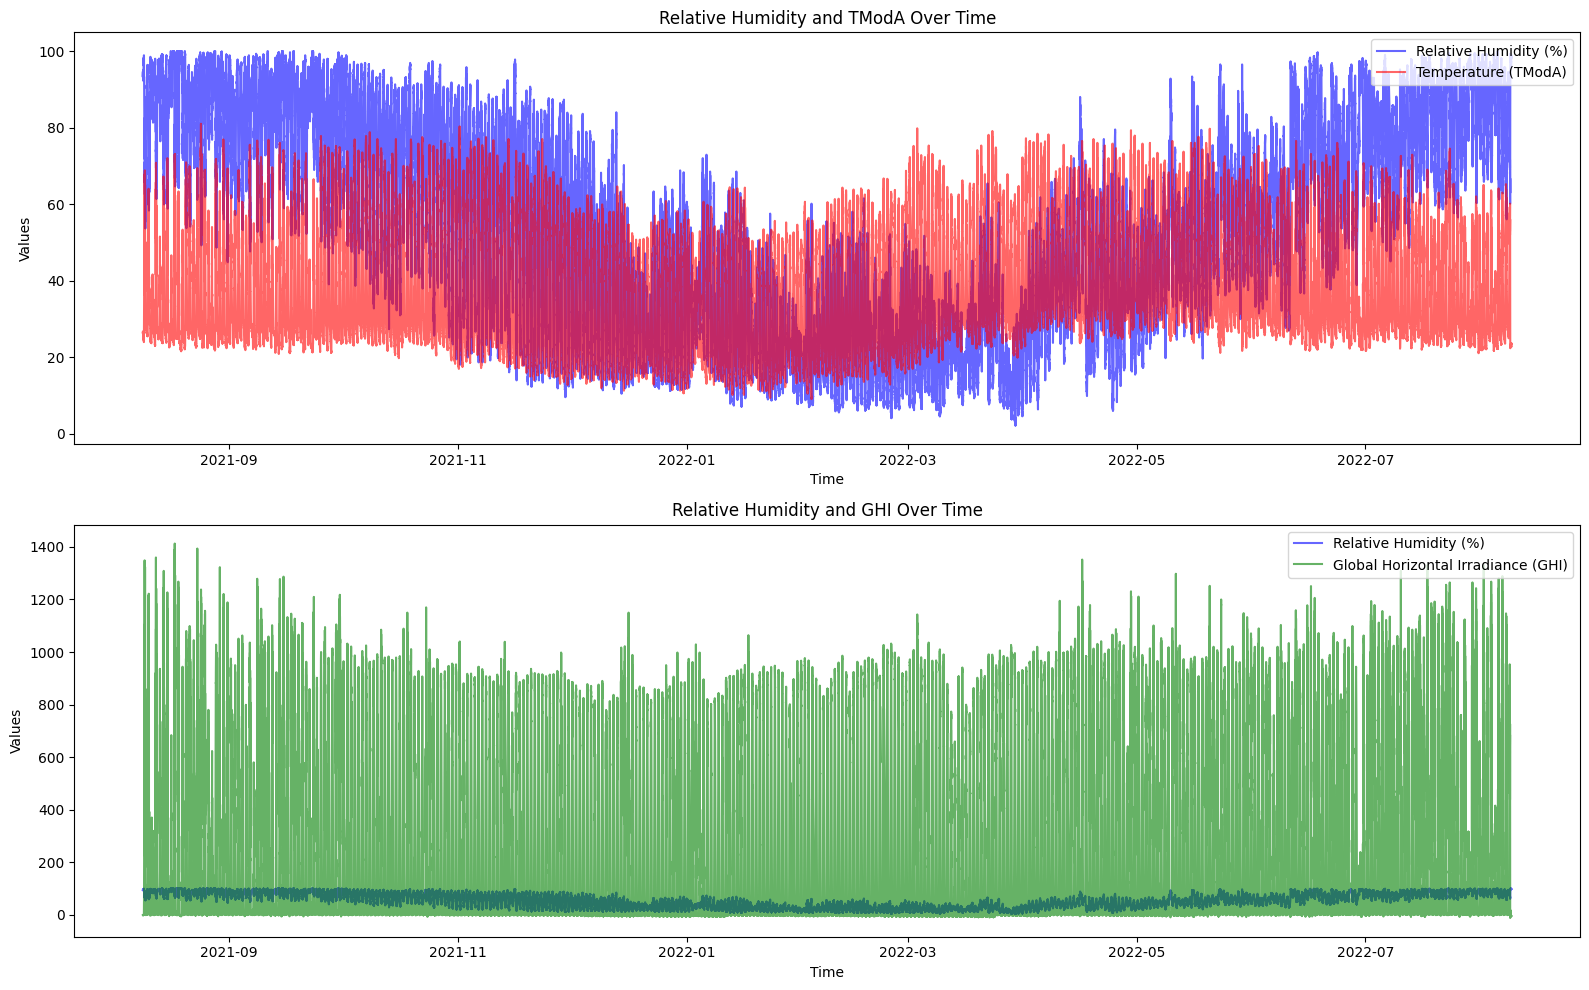

In [22]:
plot_temperature_analysis(benin_df)

### Histogram Analysis

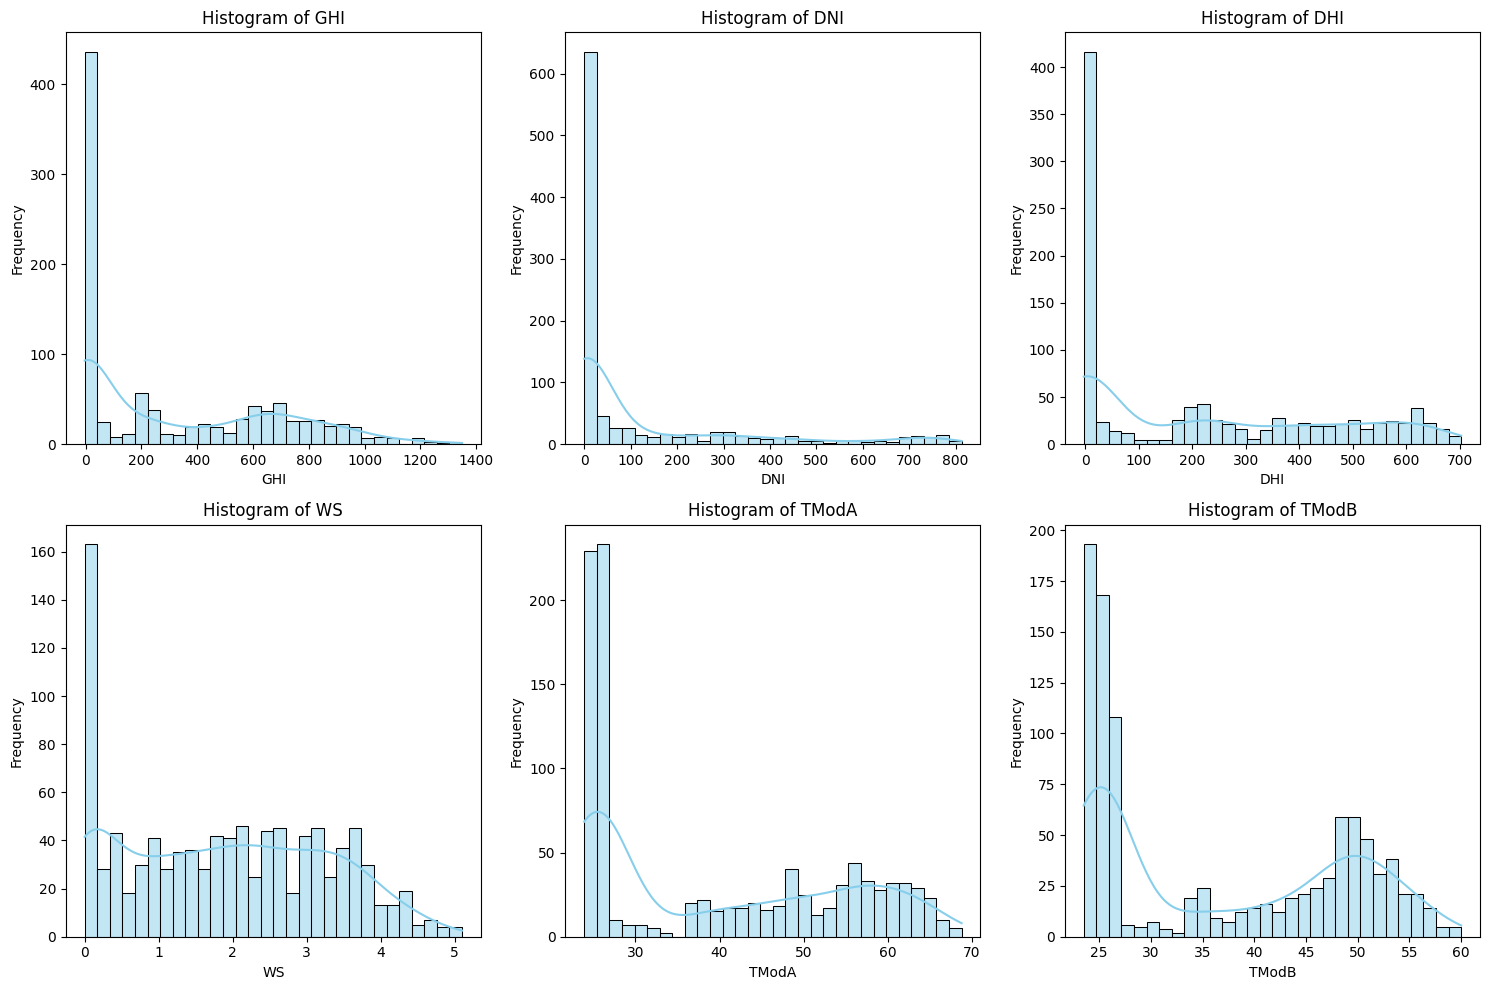

In [23]:
plot_histograms(benin_df)

### Z-Score Analysis

In [24]:
calculate_z_scores(benin_df)


Outliers in GHI:
Empty DataFrame
Columns: [Timestamp, GHI, DNI, DHI, ModA, ModB, Tamb, RH, WS, WSgust, WSstdev, WD, WDstdev, BP, Cleaning, Precipitation, TModA, TModB, Comments, Wind_Direction_Radians]
Index: []

Outliers in DNI:
              Timestamp     GHI    DNI    DHI    ModA    ModB  Tamb    RH  \
637 2021-08-09 10:38:00   915.0  767.5  250.8   841.0   845.0  29.2  73.3   
638 2021-08-09 10:39:00   945.0  769.8  278.6   871.0   876.0  29.0  73.9   
640 2021-08-09 10:41:00   934.0  774.6  258.6   858.0   862.0  28.8  74.2   
645 2021-08-09 10:46:00   958.0  778.8  269.5   881.0   886.0  29.2  73.4   
646 2021-08-09 10:47:00   964.0  771.0  282.4   892.0   897.0  29.4  72.7   
674 2021-08-09 11:15:00  1349.0  771.8  618.0  1281.5  1281.5  30.9  67.1   
850 2021-08-09 14:11:00  1324.0  813.0  532.3  1218.0  1217.0  31.0  62.9   
868 2021-08-09 14:29:00  1216.0  791.9  468.3  1118.0  1118.0  31.1  64.5   
869 2021-08-09 14:30:00  1196.0  791.8  450.9  1098.0  1096.0  31.3  64.6   

(          GHI       DNI       DHI        WS     TModA     TModB
 0   -0.898274 -0.561708 -0.939389 -1.391455 -0.876865 -0.859311
 1   -0.897995 -0.561708 -0.939389 -1.391455 -0.876865 -0.859311
 2   -0.897995 -0.561708 -0.939389 -1.171416 -0.870198 -0.859311
 3   -0.897995 -0.561240 -0.938963 -1.244762 -0.870198 -0.850986
 4   -0.897717 -0.561240 -0.938963 -1.318109 -0.870198 -0.850986
 ..        ...       ...       ...       ...       ...       ...
 995  0.670038  1.554425  0.287018 -0.217912  0.363019  0.763978
 996  0.622961  1.419123  0.293405 -0.731337  0.369685  0.772303
 997  0.460001  0.998706  0.277224 -0.657991  0.389683  0.797276
 998  0.303170  0.579693  0.267429 -0.437951  0.396350  0.822250
 999  0.283392  0.503849  0.279353 -0.657991  0.396350  0.822250
 
 [1000 rows x 6 columns],
        GHI    DNI    DHI     WS  TModA  TModB
 0    False  False  False  False  False  False
 1    False  False  False  False  False  False
 2    False  False  False  False  False  False
 3  

### Bubble Chart

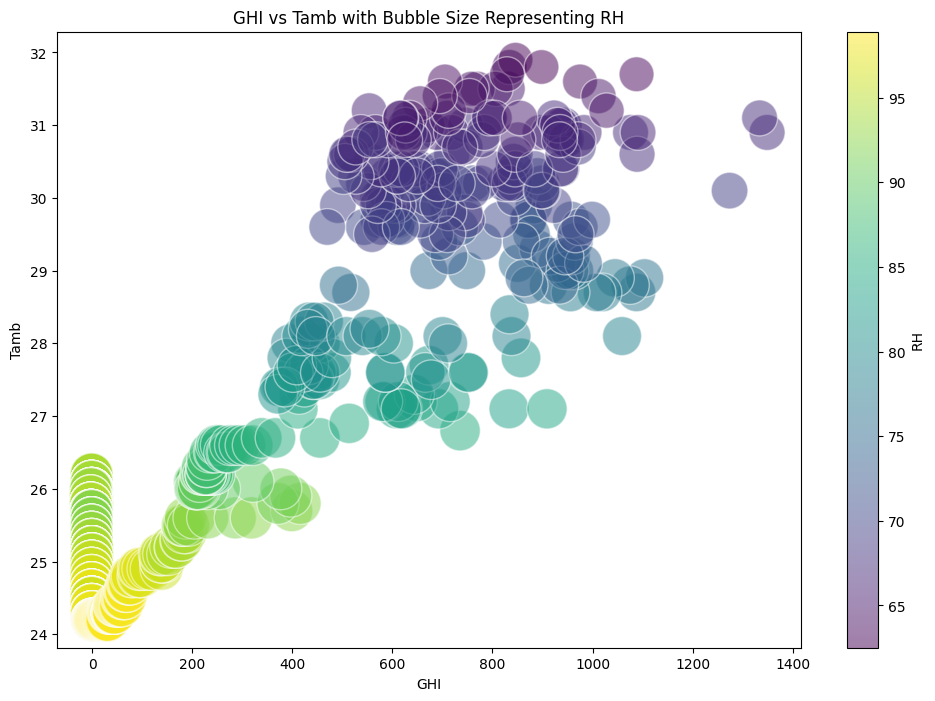

Bubble Chart for Benin:


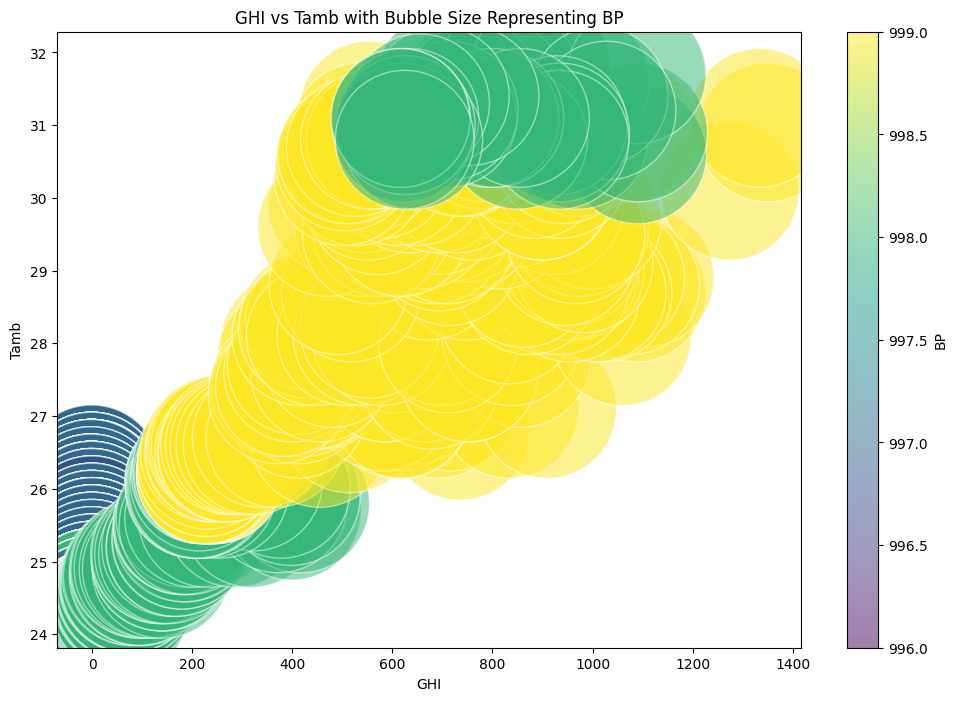

In [25]:
plot_bubble_chart(benin_df, 'GHI', 'Tamb', 'RH', 'GHI vs Tamb with Bubble Size Representing RH')
print('Bubble Chart for Benin:')
plot_bubble_chart(benin_df, 'GHI', 'Tamb', 'BP', 'GHI vs Tamb with Bubble Size Representing BP')